In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Load the data and drop duplicates
data =  pd.read_csv('assets/Comprehensive IMDb Data.csv')
data = data.drop_duplicates(subset=['title']).dropna()
data = data.drop(['knownForTitles', 'month', 'day', 'primaryName', 'titleId', 'title', 'region', 'released', 'year', 'director', 'writer', 'star', 'country', 'gross', 'company', 'category', 'nconst'], axis=1).reset_index()

# Split into features and target
X = data.drop(['score'], axis=1)
y = data['score']

# Encode categorical variables using one-hot encoding
cat_cols = ['genre','rating']
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_cat = enc.fit_transform(X[cat_cols])
X_cat_names = enc.get_feature_names_out(cat_cols)
X_cat_df = pd.DataFrame(X_cat, columns=X_cat_names)



# Plot the actual vs. predicted scores
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Score')
# plt.ylabel('Predicted Score')
# plt.title('Actual vs. Predicted Scores')
# plt.show()

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# Combine one-hot encoded features with numeric features
num_cols = ['budget','runtime']
X_num = X[num_cols].fillna(0)
X_all = pd.concat([X_num, X_cat_df], axis=1)

# Normalize the numeric features
scaler = StandardScaler()
X_all[num_cols] = scaler.fit_transform(X_all[num_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Set up hyperparameter search
param_grid = {
        'kernel': kernels,
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 1],
        'degree': [2, 3, 4] if 'poly' in kernels  else [2, 3],
        'coef0': [0.0, 1.0, 2.0] if 'poly' in kernels  or 'sigmoid' in kernels  else [0.0],
        'shrinking': [True, False]
    }
# perform grid search


In [5]:
# perform grid search
svm_model = SVR()
grid_search = GridSearchCV(svm_model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Train a SVM  hyperparameter tuning
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_


# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best estimator parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best estimator parameters: {'C': 0.1, 'coef0': 2.0, 'degree': 2, 'epsilon': 1, 'kernel': 'poly', 'shrinking': True}
Mean Squared Error (MSE): 0.69321948612777
R-squared (R2): 0.26273462871117814


Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Best estimator parameters: {'C': 0.1, 'coef0': 2.0, 'degree': 2, 'epsilon': 1, 'kernel': 'poly', 'shrinking': True}

Mean Squared Error (MSE): 0.69321948612777

R-squared (R2): 0.26273462871117814

In [6]:
# Create the final SVR model with the best parameters
final_svr = SVR(C= 0.1, coef0= 2.0, degree= 2, epsilon= 1, kernel= 'poly', shrinking= True)
# Fit the final SVR model to the training data
final_svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_svr.predict(X_test)

# Evaluate the performance of the final SVR model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final SVR model parameters:", final_svr.get_params())
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Final SVR model parameters: {'C': 0.1, 'cache_size': 200, 'coef0': 2.0, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Mean Squared Error (MSE): 0.69321948612777
R-squared (R2): 0.26273462871117814


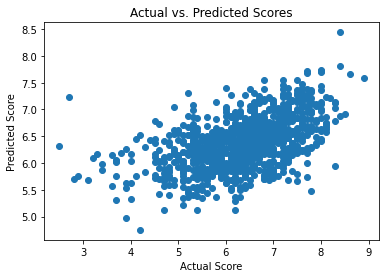

In [7]:
# Plot the actual vs. predicted scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Scores')
plt.show()

C:\Users\Acer\AppData\Local\Temp/ipykernel_12608/2137200520.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y, hist=False, color="r", label="Actual")
C:\Users\Acer\AppData\Local\Temp/ipykernel_12608/2137200520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,hi

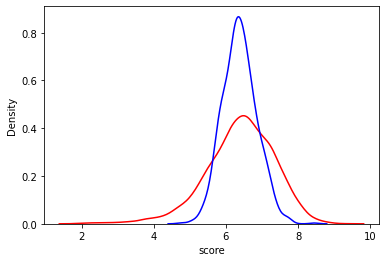

In [10]:
# Plot the distribution of actual and predicted scores
ax=sns.distplot(y, hist=False, color="r", label="Actual")
sns.distplot(y_pred,hist=False, color="b", label="Fitted",ax=ax)
plt.show()